In [1]:
#import Data wrangling tools
import pandas as pd
import numpy as np

In [2]:
#import data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
transaction_data = pd.read_excel('quantium/QVI_transaction_data.xlsx')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transaction_data.shape

(264836, 8)

In [5]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 15.2+ MB


In [6]:
#changing the datatypes
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='D', origin ='1899-12-30')
transaction_data['STORE_NBR'] = transaction_data['STORE_NBR'].astype('category')
transaction_data['PROD_NBR'] = transaction_data['PROD_NBR'].astype('category')
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].astype('category')

In [7]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  category      
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  category      
 5   PROD_NAME       264836 non-null  category      
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(1), int64(3)
memory usage: 11.1 MB


In [8]:
transaction_data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [9]:
transaction_data.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [10]:
transaction_data['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [11]:
#Top 5 most ordered product based on quantity
transaction_data.pivot_table(values = 'PROD_QTY', index = 'PROD_NAME', aggfunc =np.sum).sort_values(by='PROD_QTY', ascending = False)

,PROD_QTY
PROD_NAME,
Dorito Corn Chp Supreme 380g,6509
Kettle Mozzarella Basil & Pesto 175g,6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309
Cobs Popd Sea Salt Chips 110g,6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
...,...
RRD Pc Sea Salt 165g,2702
Woolworths Medium Salsa 300g,2700
NCC Sour Cream & Garden Chives 175g,2682


In [12]:
#value of 200 in PROD_QTY column is an outlier. let's investigate
transaction_data.loc[transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


so both outlying transaction of product quantity was from the same customer and this is definitely not a retail order so we'll drop it.

In [13]:
transaction_data.drop(transaction_data[transaction_data['PROD_QTY'] == 200].index, inplace=True)

In [14]:
transaction_data['PROD_QTY'].value_counts()

2    236039
1     27518
5       450
3       430
4       397
Name: PROD_QTY, dtype: int64

Also important to note that we have most quantity of product bought in doubles. could be useful in future

In [15]:
#Let's Check for most ordered product
transaction_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

Most ordered product is Kettle Mozzarella

In [16]:
#Now let's get the different Brands from the product name
transaction_data['BRANDS'] = transaction_data['PROD_NAME'].str.split(' ').str[0]
transaction_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRANDS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths


In [17]:
#seems like there are dupliocates of some brand namese.g ww and woolworths, Ncc and Naturals and more
#so we rename them for consistency
transaction_data['BRANDS'].replace('Ncc', 'Natural', inplace=True)
transaction_data['BRANDS'].replace('Ccs', 'CCS', inplace=True)
transaction_data['BRANDS'].replace('Smith', 'Smiths', inplace=True)
transaction_data['BRANDS'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace=True)
transaction_data['BRANDS'].replace('Dorito', 'Doritos', inplace=True)
transaction_data['BRANDS'].replace('ww', 'Woolworths', inplace=True)
transaction_data['BRANDS'].replace('Infzns', 'Infuzions', inplace=True)
transaction_data['BRANDS'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace=True)
transaction_data['BRANDS'].replace('Snbts', 'Sunbites', inplace=True)


In [18]:
#How many brands do we have in this dataset
transaction_data['BRANDS'].nunique()

25

##### Total of 25 unique brands of Chips


In [19]:
#Amount of time a product from a brand was ordered
brandnames = transaction_data['BRANDS'].value_counts()
brandnames

Kettle           41288
Smiths           31823
Doritos          28145
Pringles         25102
Infuzions        14201
Thins            14075
RRD              11894
WW               10320
Cobs              9693
Tostitos          9471
Twisties          9454
Old               9324
Tyrrells          6442
Grainwaves        6272
Natural           6050
Red Rock Deli     5885
Cheezels          4603
CCs               4551
Woolworths        4437
Sunbites          3008
Cheetos           2927
Burger            1564
GrnWves           1468
NCC               1419
French            1418
Name: BRANDS, dtype: int64

We have the most amount of orders from Kettle Brand
And the least amount of orders from French Brand

In [20]:
#We should also note the types of product from Kettle brand since they have the most orders and theamount of orders
#for each of these products.
Kettle = transaction_data[transaction_data['BRANDS']=='Kettle']
unique_Kettle = Kettle.PROD_NAME.nunique()
print(unique_Kettle)
Kettle.PROD_NAME.value_counts()[:unique_Kettle]

13


Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Kettle 135g Swt Pot Sea Salt                3257
Kettle Sensations   Camembert & Fig 150g    3219
Kettle Sweet Chilli And Sour Cream 175g     3200
Kettle Sea Salt     And Vinegar 175g        3173
Kettle Original 175g                        3159
Kettle Honey Soy    Chicken 175g            3148
Kettle Tortilla ChpsBtroot&Ricotta 150g     3146
Kettle Tortilla ChpsFeta&Garlic 150g        3138
Kettle Sensations   Siracha Lime 150g       3127
Kettle Sensations   BBQ&Maple 150g          3083
Kettle Chilli 175g                          3038
Name: PROD_NAME, dtype: int64

Kettle has 13 different products type

And the quantity of order of different products from Kettle is around the same range. Thus we can see that there is general acceptance of all Kettles products.

In [21]:
#Now we do the same we did for Kettle brand for the French Brand since they (French) have the lowest order count
French = transaction_data[transaction_data['BRANDS']=='French']
unique_French = French.PROD_NAME.nunique()
print(unique_French)
French['PROD_NAME'].value_counts().head()[:unique_French]

1


French Fries Potato Chips 175g    1418
Name: PROD_NAME, dtype: int64

French has just one(1) product type.

Probably the reason or one of the reasons why they have the least amount of orders well only one way to know. Keep digging.

In [22]:
#Now we want to check the relationship between brands, their unique products and their total orders

In [23]:
brand_names = brandnames.index.to_list()


In [24]:
def unique_product_count(aList):
    counts = [] 
    brin={ }
    for brands in aList:
        brands = transaction_data[transaction_data['BRANDS'] == str(brands)]
        count = brands.PROD_NAME.nunique()
        counts.append(count)          
    brin = {aList[i]:counts[i] for i in range(len(aList))}
    return brin

    

In [25]:
unique_product_count = pd.Series(unique_product_count(brand_names))


In [26]:
prdct_sales_and_brands = pd.concat([unique_product_count, brandnames], axis=1)
prdct_sales_and_brands.set_axis(['no_of_prdct', 'total_orders'], axis=1, inplace =True)
prdct_sales_and_brands.head()


,no_of_prdct,total_orders
Kettle,13,41288
Smiths,18,31823
Doritos,10,28145
Pringles,8,25102
Infuzions,5,14201


so here we have a Table that shows products per brand and the general order per brand.

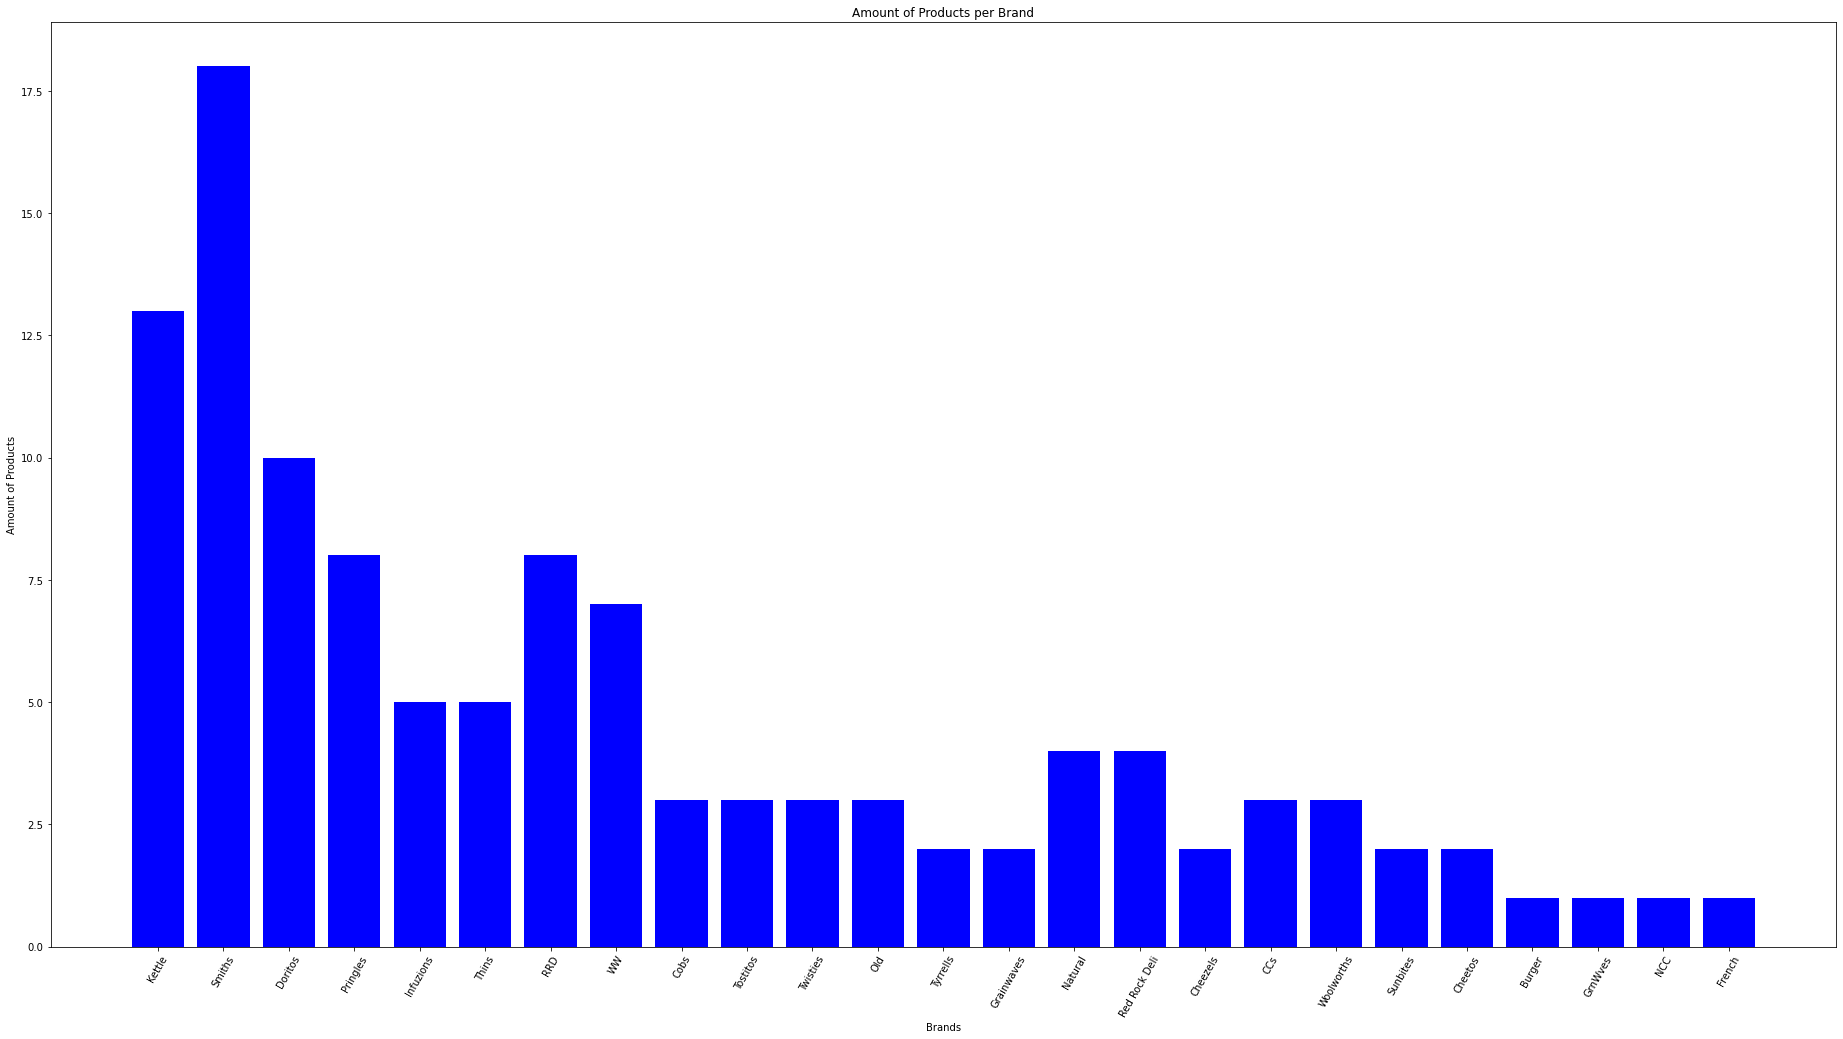

In [27]:
#Let us visualize the above table
sales_and_brands = prdct_sales_and_brands.reset_index()
plt.figure(figsize=(32,17))
g = plt.bar(x=sales_and_brands['index'], height=sales_and_brands['no_of_prdct'], color='blue')
plt.xticks(rotation = 60)
plt.xlabel('Brands')
plt.ylabel('Amount of Products')
plt.title('Amount of Products per Brand')
plt.savefig('Amount of Products per Brand.png')
plt.show()

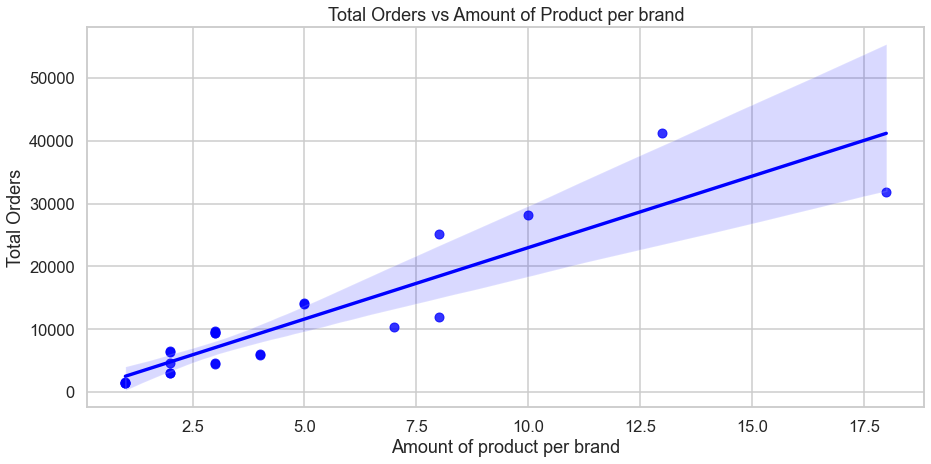

In [28]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,7))
g = sns.regplot(data = prdct_sales_and_brands, x = 'no_of_prdct', y = 'total_orders', color= 'blue')
g.set(xlabel = 'Amount of product per brand', ylabel='Total Orders')
g.set_title('Total Orders vs Amount of Product per brand')
plt.savefig('Total Orders vs Amount of Product per brand.png')
plt.show()

Here we can see a positive correlation of Amount of products per brand with Total Orders

In [29]:
#Let's see how package size impacts sales.
#first get the package size from prod_name
transaction_data['SIZE'] = transaction_data['PROD_NAME'].str[-4:-1].str.lower()
transaction_data['SIZE'].head(3)

0    175
1    175
2    170
Name: SIZE, dtype: object

In [30]:
orders_and_size = pd.DataFrame(transaction_data.groupby('BRANDS')['SIZE'].value_counts().sort_values(ascending = False))
orders_and_size.rename(columns={'SIZE':'sales_per_size'}, inplace=True)
orders_and_size= orders_and_size.reset_index()
orders_and_size.drop(orders_and_size[orders_and_size['SIZE'] == 'sal'].index, inplace=True)
orders_and_size.head()

,BRANDS,SIZE,sales_per_size
0,Pringles,134,25102
1,Kettle,175,19022
2,Kettle,150,19009
3,Thins,175,14075
4,Infuzions,110,12694


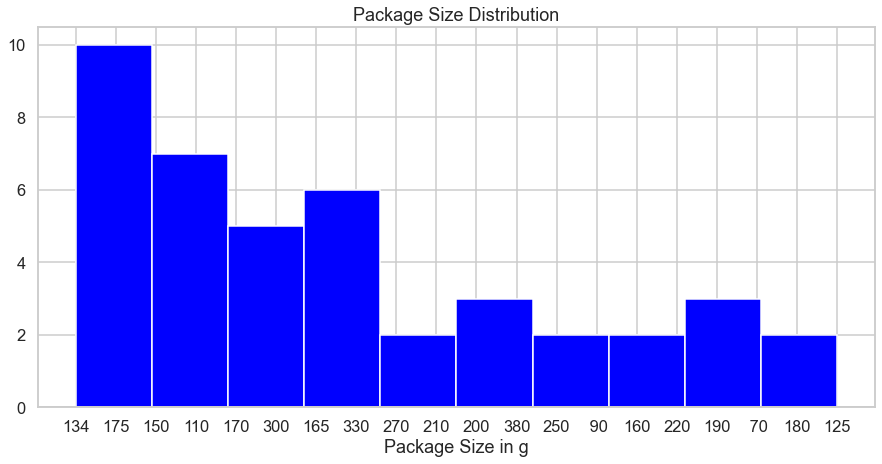

In [31]:
plt.figure(figsize=(15,7))
g = orders_and_size['SIZE'].hist(color='blue')
plt.title('Package Size Distribution')
plt.xlabel('Package Size in g')
plt.savefig('Package Size Distribution.png')
plt.show()

In [32]:
orders_and_size['SIZE'].value_counts()
orders_and_size['SIZE']= pd.to_numeric(orders_and_size['SIZE'])

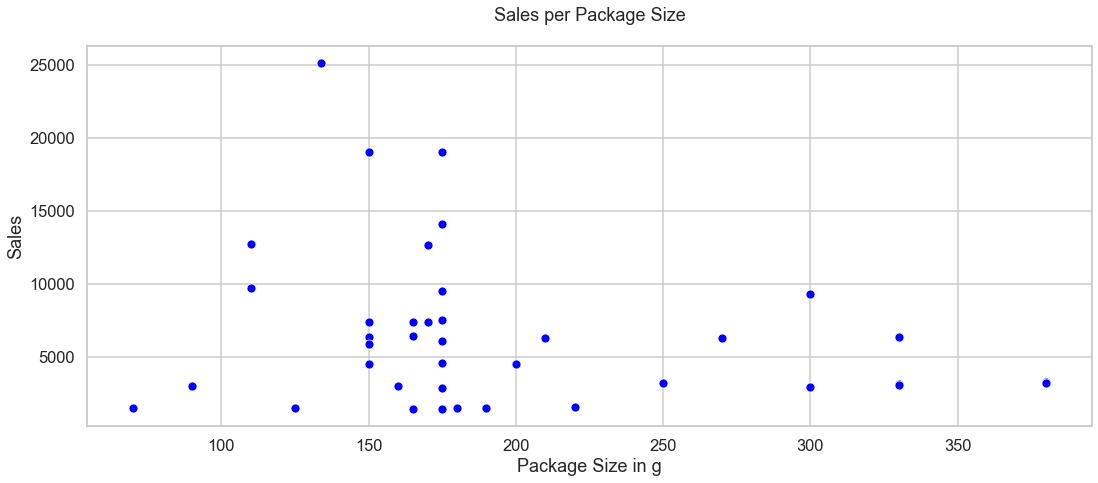

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,7))
g = sns.scatterplot(data = orders_and_size, x = 'SIZE', y = 'sales_per_size', color= 'blue')
g.set(xlabel = 'Package Size in g', ylabel='Sales')
g.set_title('Sales per Package Size', y=1.05)
plt.savefig('Sales per Package Size.png')
plt.show()

We can see that we have more sales on packages within 150g to 200g. Which also corresponds to the distribution range of counts. i.e more sales on package size with more availability.

<Figure size 2160x504 with 0 Axes>

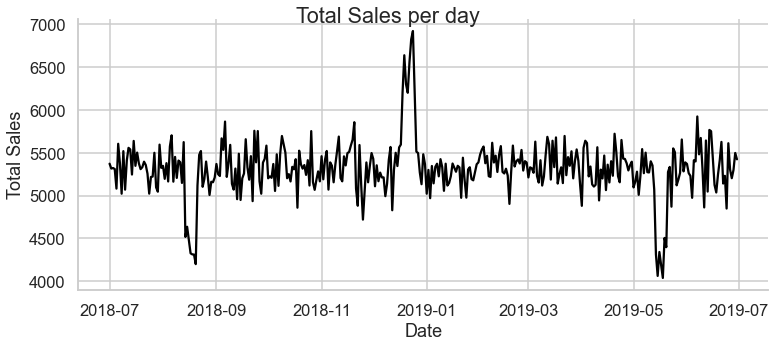

In [34]:

a = transaction_data.pivot_table(values='TOT_SALES', index='DATE', aggfunc ='sum')
plt.figure(figsize=(30, 7))
g = sns.relplot(data = a, x=a.index, y= a.TOT_SALES, color ='black', kind='line' , aspect=20/9, height=5)
g.set(xlabel = 'Date', ylabel='Total Sales')
g.fig.suptitle('Total Sales per day')
plt.savefig('Total Sales per day.png')
plt.show()

we can see a significant spike up in sales just before the new year which represents the month of December

In [35]:
#Which brand has the most sale?.
#We know that one order can have multiple sales, we've seen that Kettle has the most amount of orders but does it have more sales revenue?
transaction_data.groupby('BRANDS')['TOT_SALES'].sum().sort_values(ascending=False)

BRANDS
Kettle           390239.8
Doritos          240590.9
Smiths           224660.2
Pringles         177655.5
Infuzions         99047.6
Old               90785.1
Thins             88852.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
RRD               64954.5
Tyrrells          51647.4
Grainwaves        43048.8
Cheezels          40029.9
WW                35889.5
Natural           34272.0
Red Rock Deli     30091.5
CCs               18078.9
Cheetos           16884.5
Woolworths        13454.1
Sunbites           9676.4
GrnWves            8568.4
NCC                8046.0
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

with this we can see that Kettle brand has the most sale . and Burger brand has the least sale. In terms of revenue

# Customer Data

In [36]:
customer_data = pd.read_csv('quantium/QVI_purchase_behaviour.csv')
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [37]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [38]:
customer_data['PREMIUM_CUSTOMER'] = customer_data['PREMIUM_CUSTOMER'].astype('category')
customer_data['LIFESTAGE'] = customer_data['LIFESTAGE'].astype('category')

In [39]:
customer_data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [40]:
customer_data['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [41]:
customer_data.groupby('PREMIUM_CUSTOMER')['LIFESTAGE'].value_counts()

PREMIUM_CUSTOMER                        
Budget            OLDER SINGLES/COUPLES     4929
                  OLDER FAMILIES            4675
                  RETIREES                  4454
                  YOUNG FAMILIES            4017
                  YOUNG SINGLES/COUPLES     3779
                  MIDAGE SINGLES/COUPLES    1504
                  NEW FAMILIES              1112
Mainstream        YOUNG SINGLES/COUPLES     8088
                  RETIREES                  6479
                  OLDER SINGLES/COUPLES     4930
                  MIDAGE SINGLES/COUPLES    3340
                  OLDER FAMILIES            2831
                  YOUNG FAMILIES            2728
                  NEW FAMILIES               849
Premium           OLDER SINGLES/COUPLES     4750
                  RETIREES                  3872
                  YOUNG SINGLES/COUPLES     2574
                  YOUNG FAMILIES            2433
                  MIDAGE SINGLES/COUPLES    2431
                  OLDER FAMI

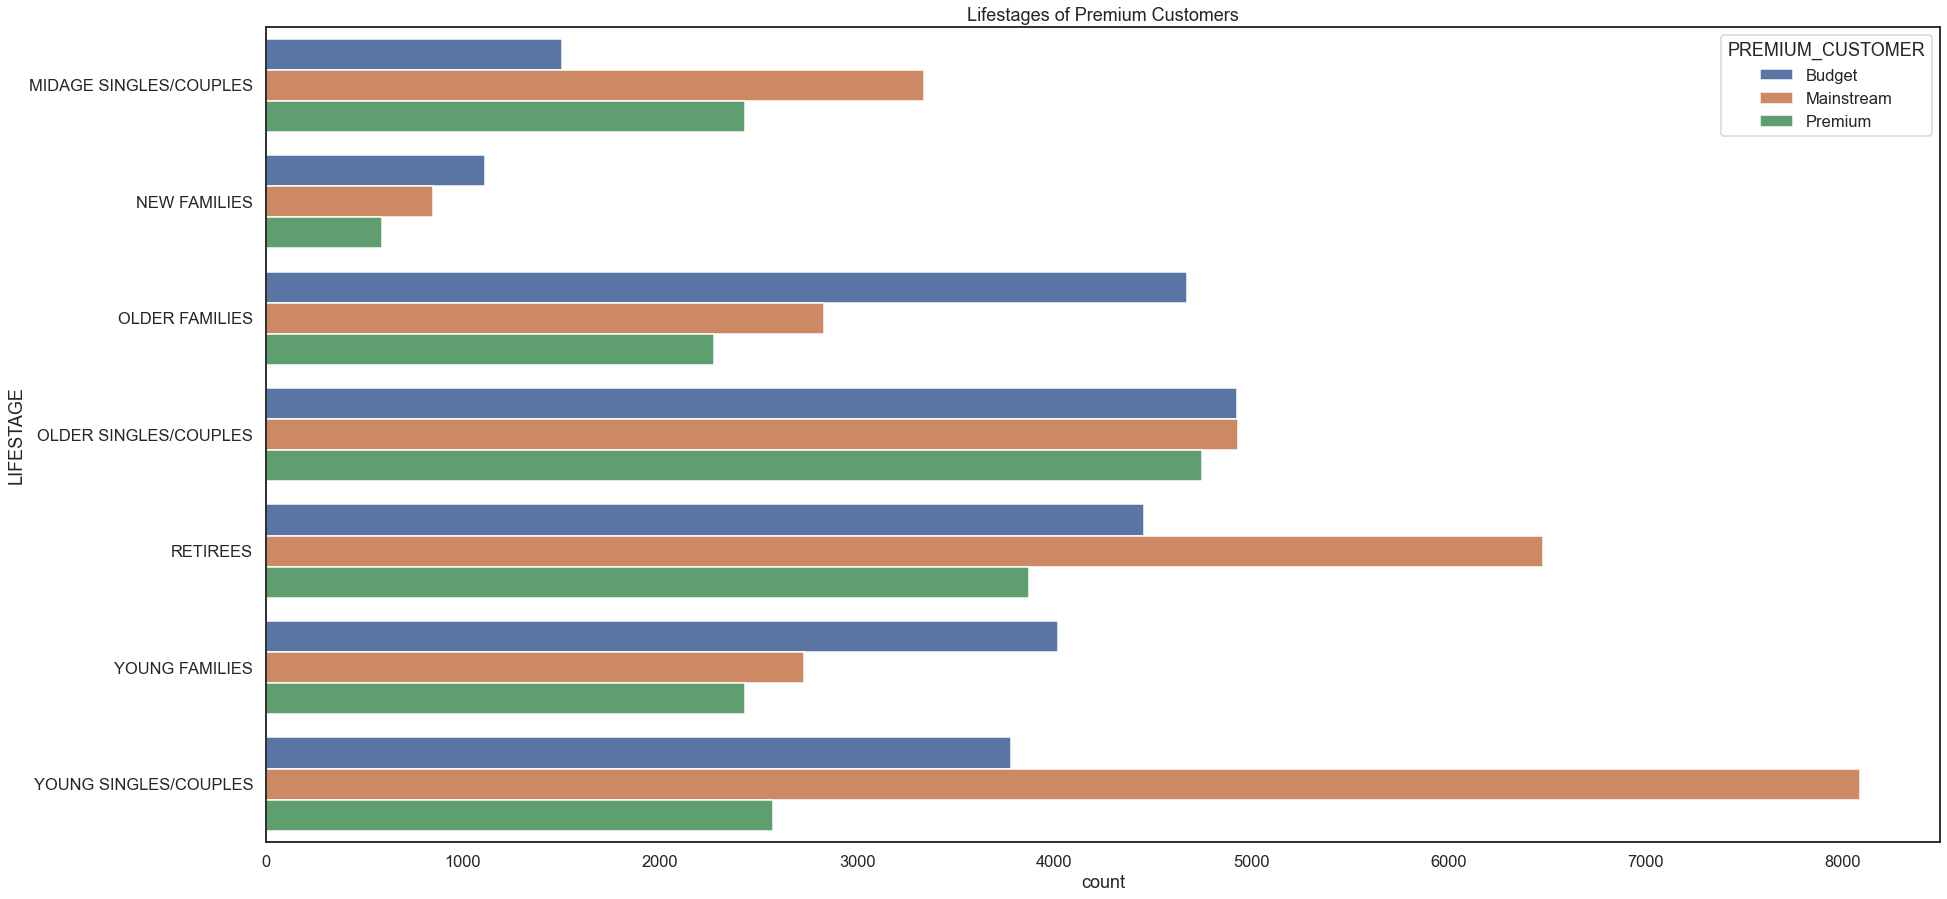

In [42]:
plt.figure(figsize=(30, 15))
sns.set_style('white')
g = sns.countplot( y= 'LIFESTAGE', data = customer_data, hue='PREMIUM_CUSTOMER', palette='deep')
g.set_title('Lifestages of Premium Customers')
plt.savefig('Count of Premium Customers and their Lifestages')

# Merge transaction data and customer data

In [43]:
full_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR')

In [44]:
full_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRANDS,SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,WW,160,MIDAGE SINGLES/COUPLES,Budget


PREMIUM_CUSTOMER
Mainstream    750744.50
Budget        676211.55
Premium       506158.95
Name: TOT_SALES, dtype: float64


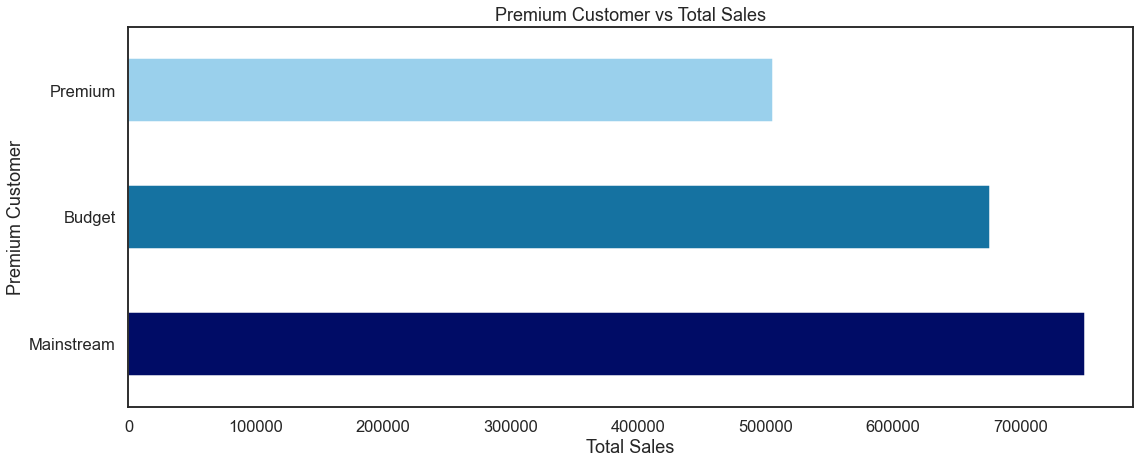

In [53]:
#First we look at the premium customers relationship with Total sales
plt.figure(figsize=(18,7))
print(full_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False))
full_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False).plot.barh(color=['#000C66','#1572A1', '#9AD0EC'])
plt.title('Premium Customer vs Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Premium Customer')
plt.savefig('Premium Customer vs Total Sales')
plt.show()

Mainstream customers bring in the most sales revenue

In [46]:
#Now we look at the premium customers lifestage in relationship to Total sales
p = pd.DataFrame(full_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False))
p.reset_index(inplace=True)
p.head()

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,OLDER FAMILIES,Budget,168363.25
1,YOUNG SINGLES/COUPLES,Mainstream,157621.60
2,RETIREES,Mainstream,155677.05
3,YOUNG FAMILIES,Budget,139345.85
4,OLDER SINGLES/COUPLES,Budget,136769.80


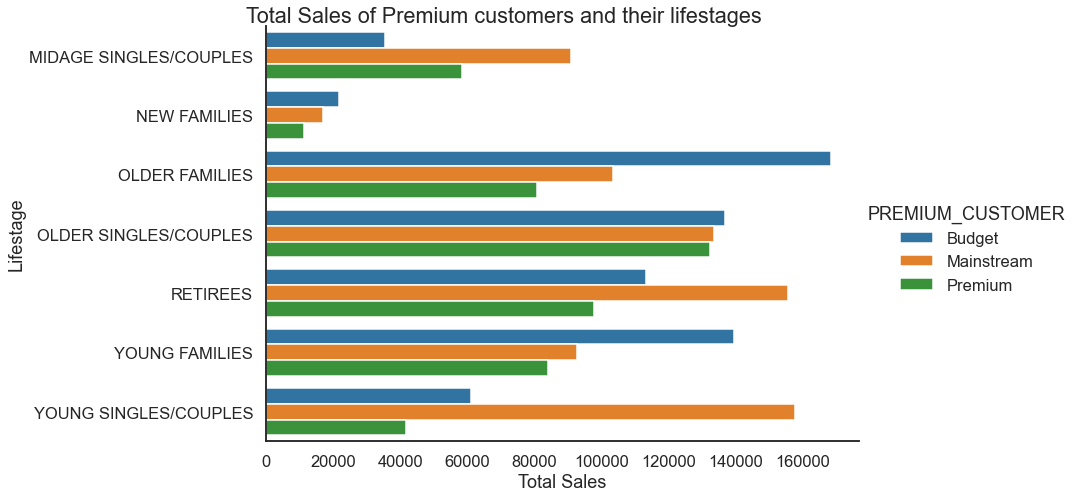

In [47]:
#let's plot the data
g = sns.catplot(data = p, y= 'LIFESTAGE', x='TOT_SALES', hue='PREMIUM_CUSTOMER', kind = 'bar', height = 7, aspect=15/8)
g.fig.suptitle('Total Sales of Premium customers and their lifestages', y=1.0005)
g.set(xlabel = 'Total Sales', ylabel = 'Lifestage')
plt.savefig('Total Sales of Premium customers and their lifestages.png')

we can see that most sales are related to OLDER FAMILIES in the Budget category, then from the mainstream category we have YOUNG SINGLES/COUPLES and RETIREES respectively.
And it is noteworthy to see that for all the LIFESTAGE categories except MIDAGE SINGLES/COUPLES we have Premium category as the least sales related area.


# Insights and recommendation


# Insights
    - Most ordered product: Kettle Mozzarella Basil & Pesto 175g  it was ordered 3304 times, this is without considering quantity of product per order.
    - Least ordered product: WW Crinkle Cut Original 175g which was ordered 1410 times without considering quantity of product per order.
    -Most ordered product based on quantity: Kettle Mozzarella Basil & Pesto 175g is also the most ordered product based on quantity. 6381 units were ordered in Total
    -Least orderd product based on quantity: French Fries Potato Chips 175g	 is the least ordered product based on quantity. 2643 units were ordered in Total
    - Most customers are multipack buyers as i was able to extract that of all the orders 89.6% of orders are of multiple quantities.
    -There are 25 unique Brands .
    -We have the most amount of sales from Kettle Brand And the least amount of sales from French Brand.
    -Kettle has 13 different products type and the quantity of order of different products from Kettle is around the same range. Thus we can see that there is general acceptance of all Kettles products. French has just one Product type.
    - There is a positive correlation of Amount of products per brand with Total Orders.
    -We have more sales on packages between the size of 150g and 200g
    -we can see a significant spike up in sales just before the new year which represents the month of December
    -we can see a significant spike down in sales late in the month of august 2018 and may 2019(could be due to climate factors)
    - Kettle brand has the most amount of orders and sales
    - Most customers are on the mainstream category, the other categories are not far away in terms of customers also.
    - We can see that most sales are related to OLDER FAMILIES in the Budget category, then from the mainstream category we have YOUNG SINGLES/COUPLES and RETIREES respectively.
        
        
# Recommendations
    - More varieties of Brand products should be made available as it seems to give customers more things to try out, thus aiding sales.
    - There is general acceptance of products from Kettle brand so more products from Kettle should be made available.
    - Chips between 150g and 200g seem to have more sales, so focus should be placed on making available chips within thar size range
    -Since we have spike up in sales in the month of December, making more products available at that time is encouraged. Availabilty of new products at that time is also encouraged.
    -Promo packages should be made for all categories of NEW FAMILIES as they have the lowest sales in all categories